In [1]:
#Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import scipy.cluster.hierarchy as sch


In [3]:
#Read dataset
df=pd.read_csv('C:/Users/Lenovo/Downloads/Clustering/EastWestAirlines.csv')
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


**Data preprocessing**

In [4]:
# Check for missing values
print(df.isnull().sum())

df.fillna(df.mean(), inplace=True)

from scipy import stats
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
df = df[(z_scores < 3).all(axis=1)]
z_scores

sc = StandardScaler()
scaled_features = sc.fit_transform(df)
scaled_features

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64


array([[-1.76632543, -0.52326043, -0.15886912, ..., -0.43177507,
         1.43143767, -0.71809304],
       [-1.76546049, -0.66708419, -0.15886912, ..., -0.43177507,
         1.41584783, -0.71809304],
       [-1.76459555, -0.30974703, -0.15886912, ..., -0.43177507,
         1.44800188, -0.71809304],
       ...,
       [ 1.70900444,  0.21135753, -0.15886912, ..., -0.43177507,
        -1.29581034,  1.3925772 ],
       [ 1.70986938, -0.0908356 , -0.15886912, ...,  0.11817002,
        -1.29629752, -0.71809304],
       [ 1.71073432, -0.9293577 , -0.15886912, ..., -0.43177507,
        -1.29775907, -0.71809304]])

In [5]:
import seaborn as sns

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

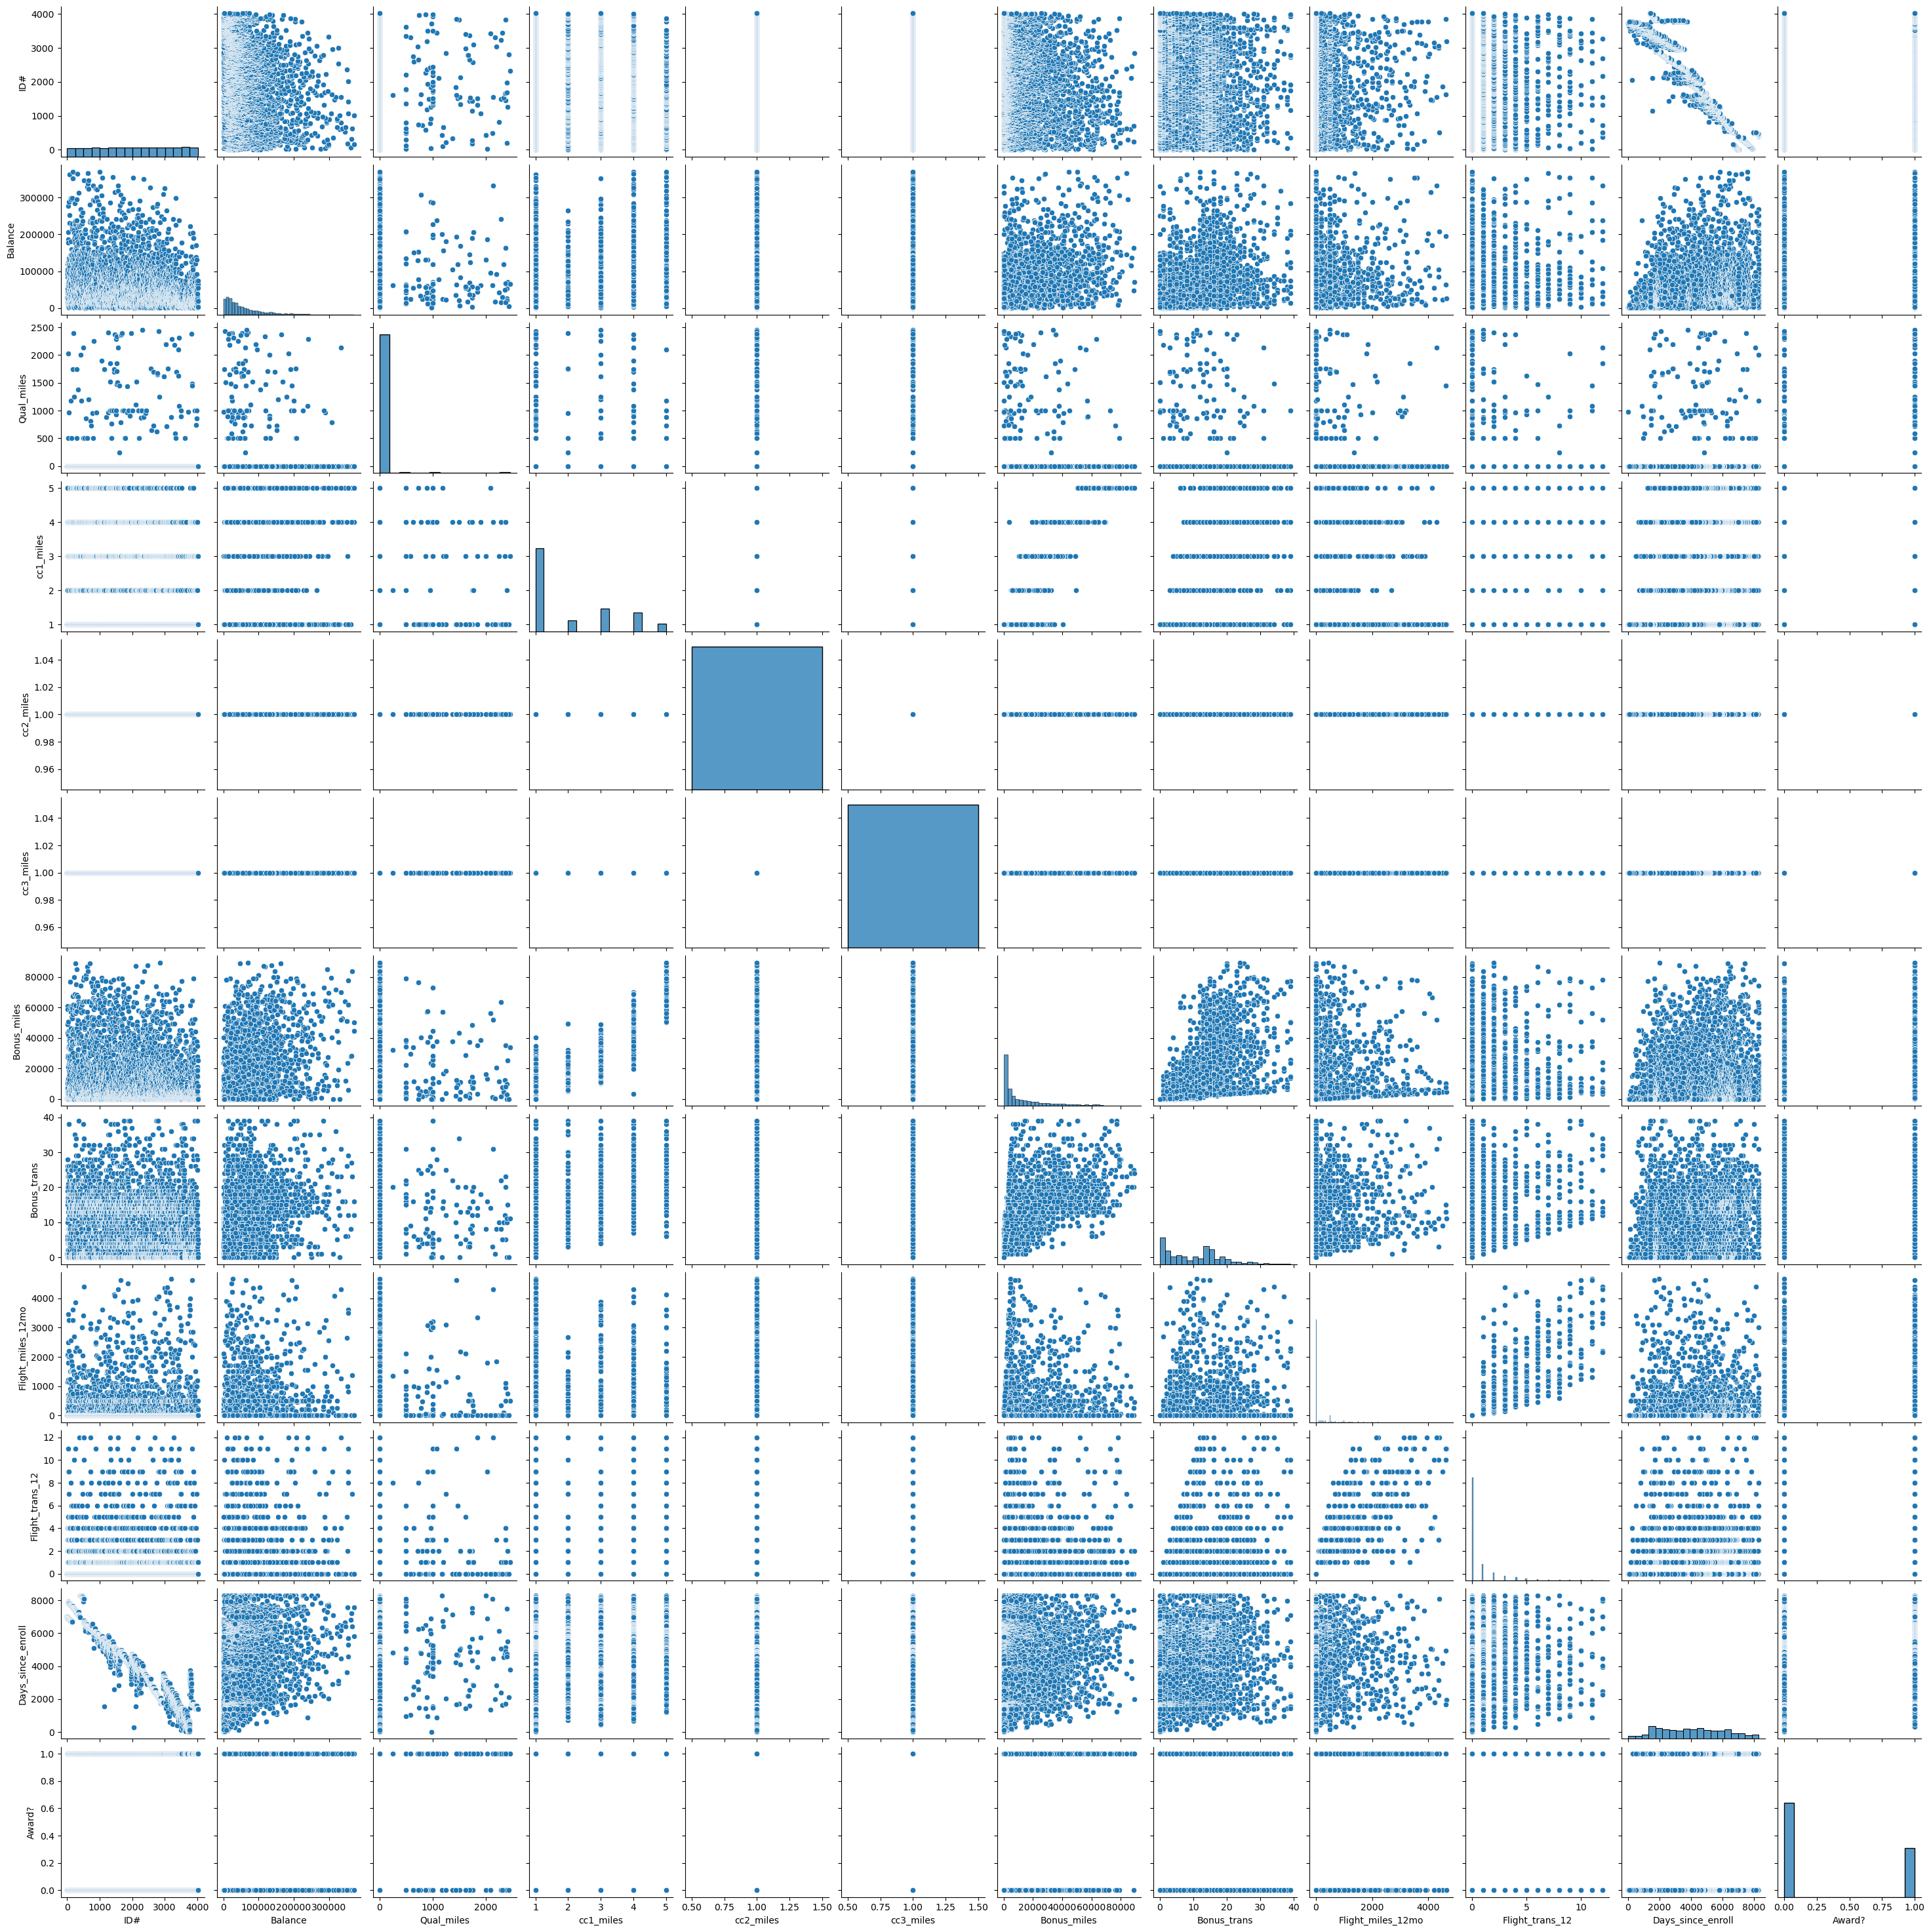

In [6]:
sns.pairplot(df)
plt.show()

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


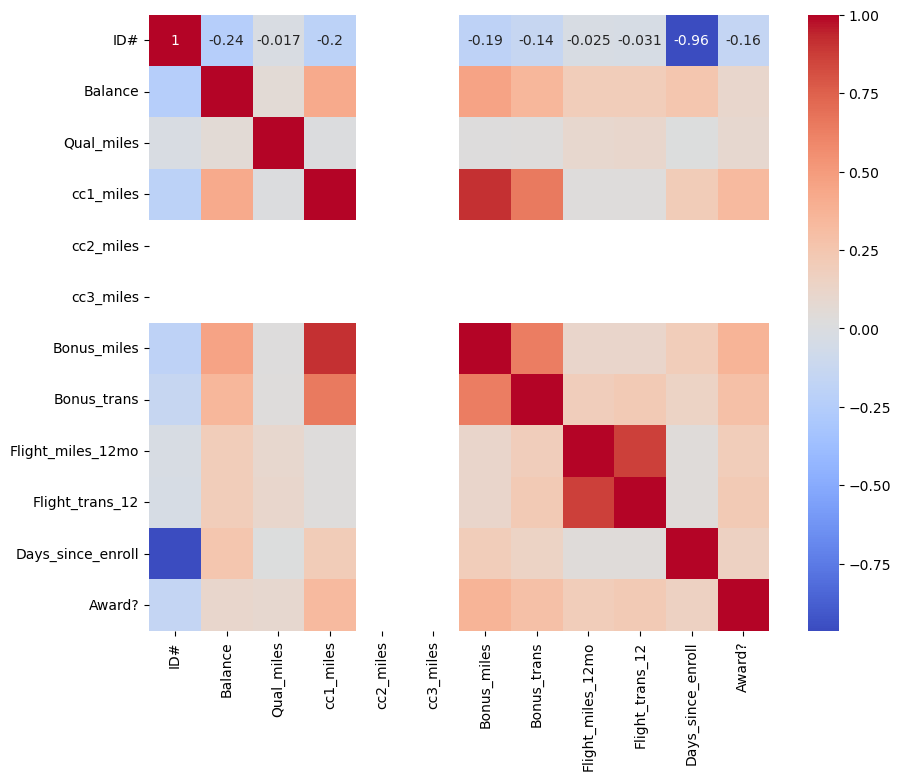

In [7]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

**K Means Cluserting**

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\

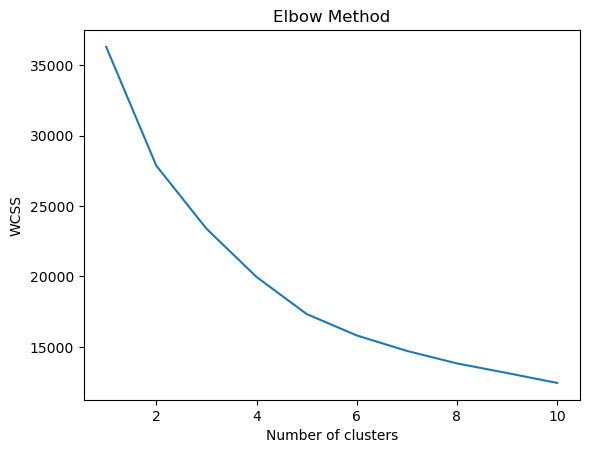

In [8]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [9]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_features)

# Evaluate K-Means
silhouette_kmeans = silhouette_score(scaled_features, kmeans_labels)
print(f'Silhouette Score for K-Means: {silhouette_kmeans}')

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for K-Means: 0.29208662652066236


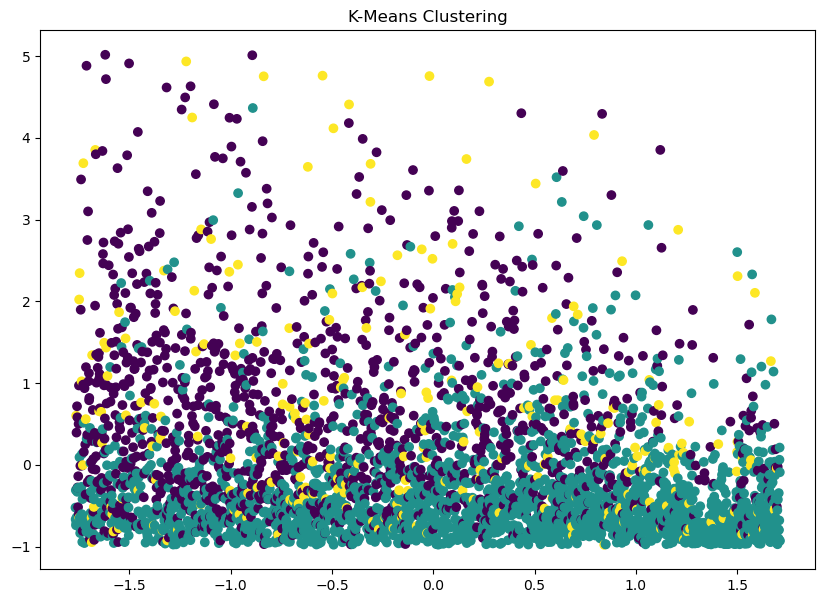

In [10]:
plt.figure(figsize=(10, 7))
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-Means Clustering')
plt.show()


**Hierarchical Clustering**

In [11]:
#Import Libraries 

In [12]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt


In [13]:
#Read dataset

In [14]:
df=pd.read_csv('C:/Users/Lenovo/Downloads/Clustering/EastWestAirlines.csv')

In [15]:
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [16]:
#Impute missing values

In [17]:
imputer = SimpleImputer(strategy='mean')  # or 'median', 'most_frequent'
df_imputed = imputer.fit_transform(df)


In [18]:
#standardlization 

In [19]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_imputed)


In [20]:
#Using Ward's method and Euclidean distance

In [21]:
Z = linkage(df_scaled, method='ward', metric='euclidean')

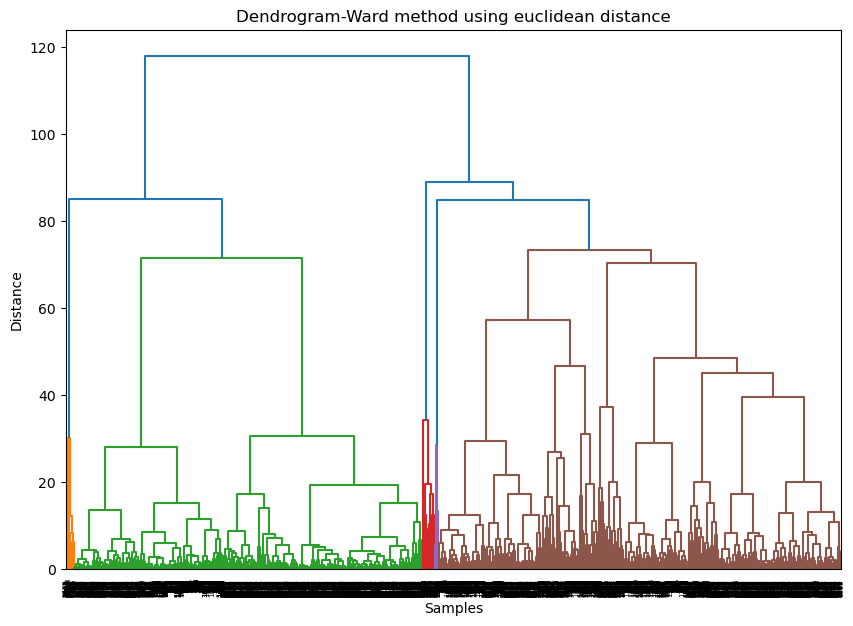

In [22]:
#Plot dendrogram
plt.figure(figsize=(10, 7))
plt.title("Dendrogram-Ward method using euclidean distance")
dendrogram(Z)
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [23]:
#using single-linkage with euclidean distance

In [24]:
Z_single = linkage(df_scaled, method='single', metric='euclidean')


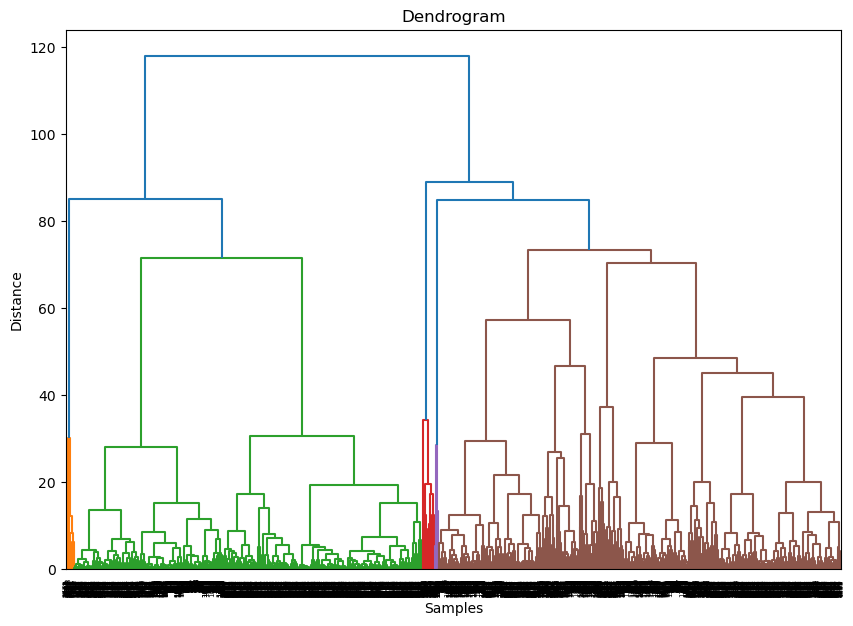

In [25]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dendrogram(Z)
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [26]:
#complete linkage with edclidean distance 

In [27]:
Z_complete = linkage(df_scaled, method='complete', metric='euclidean')

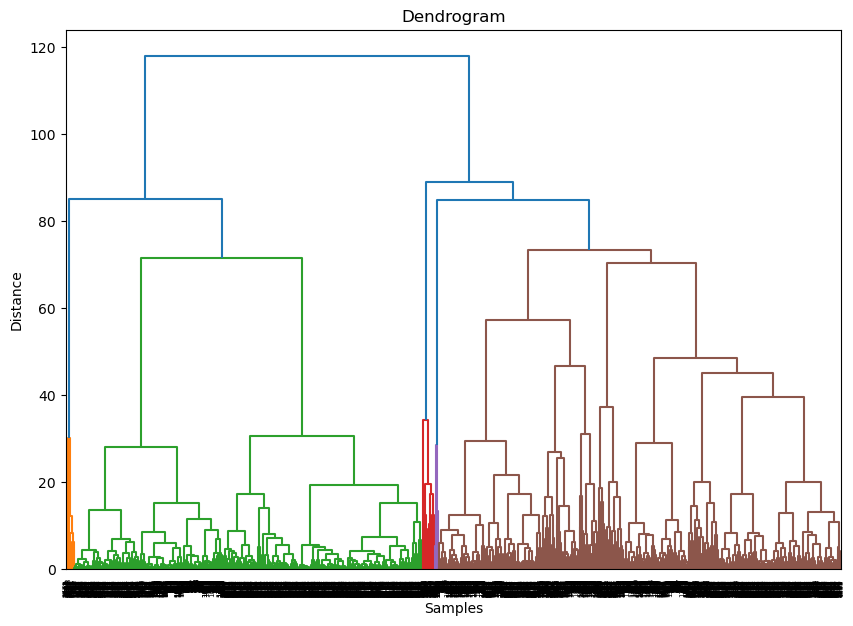

In [28]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dendrogram(Z)
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [29]:
#single linkage with cityblock manhattan distance

In [30]:
Z_single_manhattan = linkage(df_scaled, method='single', metric='cityblock')

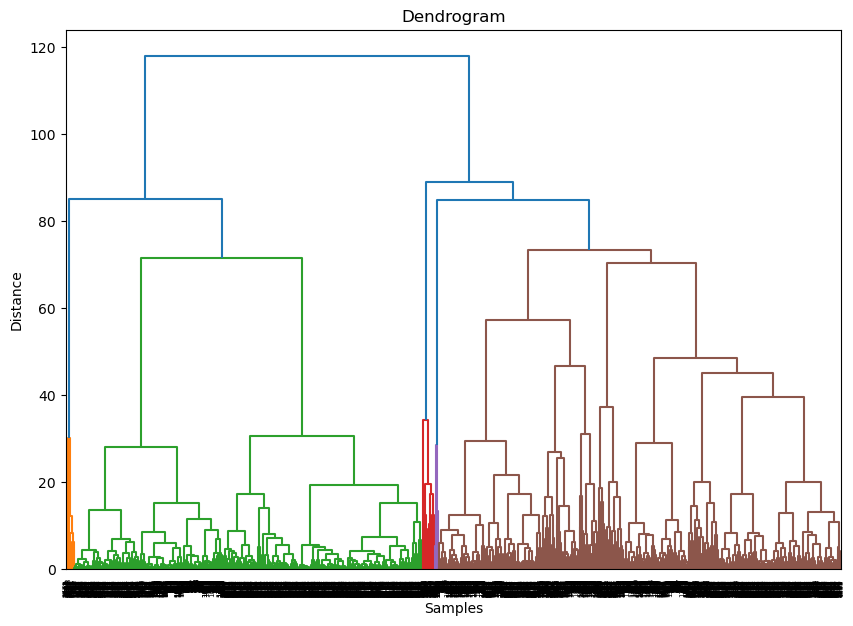

In [31]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dendrogram(Z)
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [32]:
#complete linkage with manhattan distance

In [33]:
Z_complete_manhattan = linkage(df_scaled, method='complete', metric='cityblock')

In [ ]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram- complete linkage with manhattan distance")
dendrogram(Z)
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [ ]:
#average linakge with manhattan distance

In [ ]:
Z_average_manhattan = linkage(df_scaled, method='average', metric='cityblock')

In [ ]:
plt.figure(figsize=(10, 7))
plt.title("Average Linkage Dendrogram with Manhattan Distance")
dendrogram(Z)
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [ ]:
hc_labels = fcluster(linked, t=3, criterion='maxclust')


In [ ]:
silhouette_hc = silhouette_score(scaled_features, hc_labels)
print(f'Silhouette Score for Hierarchical Clustering: {silhouette_hc}')

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=hc_labels, cmap='viridis')
plt.title('Hierarchical Clustering')
plt.show()

**DBSCAN clustering**

In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_features)


In [ ]:
silhouette_dbscan = silhouette_score(scaled_features, dbscan_labels)
print(f'Silhouette Score for DBSCAN: {silhouette_dbscan}')

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.show()